# Exploratory Data Analysis

## Importing standard libraries

In [1]:
import pymongo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
# Standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [3]:
from pymongo import MongoClient
db_client = MongoClient()

#### Connecting to database and fetching data

In [4]:
data = pd.DataFrame(list(db_client.web_scraping_db.cars_collection.find()))

In [5]:
data.shape

(1207, 14)

In [6]:
data.head()

,_id,Listing,Price,Condition:,Brand:,Model:,Trim / Edition:,Model year:,Transmission:,Body type:,Fuel type:,Mileage:,Engine capacity:,URL
0,5ef7879be1a9534c47aae29b,Kia Optima Full Option 2012,"GH₵ 39,500",Used,Kia,Optima,Full Option,2012,Automatic,Saloon,Petrol,"64,683 km",2.4 Liter,http://tonaton.com/en/ad/kia-optima-full-optio...
1,5ef7879ee1a9534c47aae29c,Mercedes Cclass 2006,"GH₵ 25,000",Used,Mercedes,Cclass,NaN,2006,Automatic,Saloon,Petrol,"98,124 km",1.8 Liter,http://tonaton.com/en/ad/mercedes-cclass-2006-...
2,5ef787afe1a9534c47aae29d,Toyota Corolla 2015,"GH₵ 42,500",Used,Toyota,Corolla,NaN,2015,Automatic,NaN,Petrol,"51,410 km",1.8 Liter,http://tonaton.com/en/ad/toyota-corolla-2015-f...
3,5ef787b2e1a9534c47aae29e,Toyota Corolla Auto 2010,"GH₵ 28,500",Used,Toyota,Corolla,Auto,2010,Automatic,Saloon,Petrol,"76,552 km",1.8 Liter,http://tonaton.com/en/ad/toyota-corolla-auto-2...
4,5ef787b6e1a9534c47aae29f,Chevrolet Cruze . 2014,"GH₵ 26,500",Used,Chevrolet,Cruze,.,2014,Automatic,Saloon,Petrol,"86,995 km",1.4 Liter,http://tonaton.com/en/ad/chevrolet-cruze-2014-...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 14 columns):
_id                  1207 non-null object
Listing              1207 non-null object
Price                1207 non-null object
Condition:           1207 non-null object
Brand:               1207 non-null object
Model:               1207 non-null object
Trim / Edition:      722 non-null object
Model year:          1207 non-null object
Transmission:        1207 non-null object
Body type:           1165 non-null object
Fuel type:           1207 non-null object
Mileage:             1207 non-null object
Engine capacity:     1207 non-null object
URL                  1207 non-null object
dtypes: object(14)
memory usage: 132.1+ KB


* Trim/Edition has 485 null values 
* Body type has 42 null values

In [8]:
data.describe()

,_id,Listing,Price,Condition:,Brand:,Model:,Trim / Edition:,Model year:,Transmission:,Body type:,Fuel type:,Mileage:,Engine capacity:,URL
count,1207,1207,1207,1207,1207,1207,722,1207,1207,1165,1207,1207,1207,1207
unique,1207,921,306,2,38,166,313,28,2,7,8,790,37,1126
top,5ef79029e1a9534c47aae4a5,Toyota Land Cruiser 2019,"GH₵ 35,000",Used,Toyota,Corolla,SE,2014,Automatic,Saloon,Petrol,0 km,1.8 Liter,http://tonaton.com/en/ad/mitsubishi-mirage-201...
freq,1,11,30,1082,437,154,27,112,1123,599,1156,53,328,7


## Cleaning data
Generally this entails, dealing with null values, duplicates, converting to appropriate data types, etc

In [9]:
data.rename(columns={'Price':'Price(GH¢)', 'Condition: ':'Condition', 'Brand: ':'Brand', 'Model: ':'Model', 'Trim / Edition: ':'Trim/Edition', 'Model year: ':'Model year', 'Transmission: ':'Transmission','Body type: ':'Body type', 'Fuel type: ':'Fuel type','Mileage: ':'Mileage(km)', 'Engine capacity: ':"Engine capacity(L)"}, inplace=True)

In [10]:
data.columns

Index(['_id', 'Listing', 'Price(GH¢)', 'Condition', 'Brand', 'Model',
       'Trim/Edition', 'Model year', 'Transmission', 'Body type', 'Fuel type',
       'Mileage(km)', 'Engine capacity(L)', 'URL'],
      dtype='object')

In [11]:
data['Trim/Edition'].head(30)

0            Full Option
1                    NaN
2                    NaN
3                   Auto
4                      .
5                    NaN
6                  Sport
7                    NaN
8                    NaN
9             2.4 liters
10                   NaN
11                 sedan
12           Spider auto
13                   NaN
14                   NaN
15                   NaN
16                   NaN
17                   NaN
18                     ,
19                   NaN
20          Fully Loaded
21                  Reno
22               Limited
23                   NaN
24                   GDI
25               Limited
26                   XLE
27                   NaN
28    Limited( 7 seater)
29                    se
Name: Trim/Edition, dtype: object

In [12]:
data['Trim/Edition'].isnull().sum()

485

A closer look at the Trim/Edition reveals that there are a lot of null values and will not be useful for analysis <br>
Hence, I will drop the Trim/Edition and _id(autogenerated by MongoDB) columns

**Drop _id  and Trim/Edition columns**

In [13]:
data.drop(columns = ['_id', 'Trim/Edition'], inplace=True)

In [14]:
data.shape

(1207, 12)

In [15]:
data.head()

,Listing,Price(GH¢),Condition,Brand,Model,Model year,Transmission,Body type,Fuel type,Mileage(km),Engine capacity(L),URL
0,Kia Optima Full Option 2012,"GH₵ 39,500",Used,Kia,Optima,2012,Automatic,Saloon,Petrol,"64,683 km",2.4 Liter,http://tonaton.com/en/ad/kia-optima-full-optio...
1,Mercedes Cclass 2006,"GH₵ 25,000",Used,Mercedes,Cclass,2006,Automatic,Saloon,Petrol,"98,124 km",1.8 Liter,http://tonaton.com/en/ad/mercedes-cclass-2006-...
2,Toyota Corolla 2015,"GH₵ 42,500",Used,Toyota,Corolla,2015,Automatic,NaN,Petrol,"51,410 km",1.8 Liter,http://tonaton.com/en/ad/toyota-corolla-2015-f...
3,Toyota Corolla Auto 2010,"GH₵ 28,500",Used,Toyota,Corolla,2010,Automatic,Saloon,Petrol,"76,552 km",1.8 Liter,http://tonaton.com/en/ad/toyota-corolla-auto-2...
4,Chevrolet Cruze . 2014,"GH₵ 26,500",Used,Chevrolet,Cruze,2014,Automatic,Saloon,Petrol,"86,995 km",1.4 Liter,http://tonaton.com/en/ad/chevrolet-cruze-2014-...


#### Null Values

In [16]:
data.isnull().sum()

Listing                0
Price(GH¢)             0
Condition              0
Brand                  0
Model                  0
Model year             0
Transmission           0
Body type             42
Fuel type              0
Mileage(km)            0
Engine capacity(L)     0
URL                    0
dtype: int64

Body type has 42 nulls, however, I will not want to drop the rows altogether because it contains valuable data for analysis <br>
It will be difficult to impute also since the values will vary for each record and it will be nearly impossible to fill it in

In [17]:
data['Body type'].value_counts()

Saloon          599
SUV / 4x4       363
Hatchback       182
Estate           10
MPV               5
Convertible       3
Coupé/Sports      3
Name: Body type, dtype: int64

#### Duplicates

In [18]:
data[data.duplicated()]

,Listing,Price(GH¢),Condition,Brand,Model,Model year,Transmission,Body type,Fuel type,Mileage(km),Engine capacity(L),URL
37,Kia Sportage EX 2018,"GH₵ 120,000",Used,Kia,Sportage,2018,Automatic,SUV / 4x4,Petrol,"19,672 km",2.0 Liter,http://tonaton.com/en/ad/kia-sportage-ex-2018-...
38,"Ford Explorer , 2006","GH₵ 48,000",Used,Ford,Explorer,2006,Automatic,SUV / 4x4,Petrol,"193,040 km",2.0 Liter,http://tonaton.com/en/ad/ford-explorer-2006-fo...
39,Toyota Corolla 2017,"GH₵ 69,500",New,Toyota,Corolla,2017,Automatic,Saloon,Petrol,"38,321 km",1.8 Liter,http://tonaton.com/en/ad/toyota-corolla-2017-f...
63,Mitsubishi Mirage 2015,"GH₵ 38,000",Used,Mitsubishi,Mirage,2015,Automatic,Hatchback,Petrol,"71,849 km",1.2 Liter,http://tonaton.com/en/ad/mitsubishi-mirage-201...
64,Toyota Camry 2009,"GH₵ 35,000",Used,Toyota,Camry,2009,Automatic,NaN,Petrol,"160,651 km",2.4 Liter,http://tonaton.com/en/ad/toyota-camry-2009-for...
...,...,...,...,...,...,...,...,...,...,...,...,...
1117,"Volkswagen Passat , 2003","GH₵ 16,000",Used,Volkswagen,Passat,2003,Automatic,Saloon,Petrol,"71,000 km",1.8 Liter,http://tonaton.com/en/ad/volkswagen-passat-200...
1142,Toyota Corolla Limited Edition 2010,"GH₵ 38,500",Used,Toyota,Corolla,2010,Automatic,Saloon,Petrol,"45,280 km",1.8 Liter,http://tonaton.com/en/ad/toyota-corolla-limite...
1143,Honda Civic Fully loaded 2015,"GH₵ 58,500",Used,Honda,Civic,2015,Automatic,Saloon,Petrol,"46,824 km",1.8 Liter,http://tonaton.com/en/ad/honda-civic-fully-loa...
1169,Hyundai Elantra S 2013,"GH₵ 45,000",Used,Hyundai,Elantra,2013,Manual,Saloon,Petrol,"36,000 km",1.8 Liter,http://tonaton.com/en/ad/hyundai-elantra-s-201...


In [19]:
data.drop_duplicates(keep='first', inplace=True)

In [20]:
data[data.duplicated()]

,Listing,Price(GH¢),Condition,Brand,Model,Model year,Transmission,Body type,Fuel type,Mileage(km),Engine capacity(L),URL


In [21]:
data.shape

(1129, 12)

#### Converting values to numeric types

In [22]:
def get_figure(value, index):
    return value.split(" ")[index]

def comma(value):
    return int(value.replace(",", ""))

In [23]:
data['Price(GH¢)'] = data['Price(GH¢)'].apply(lambda x: get_figure(x, 1)).apply(lambda x: comma(x))

data['Mileage(km)'] = data['Mileage(km)'].apply(lambda x: get_figure(x, 0)).apply(lambda x: comma(x))

data['Engine capacity(L)'] = data['Engine capacity(L)'].apply(lambda x: get_figure(x, 0))

In [24]:
print(data['Price(GH¢)'].dtype)

print(data['Mileage(km)'].dtype)

print(data['Engine capacity(L)'].dtype)

int64
int64
object


In [25]:
data[['Price(GH¢)', 'Mileage(km)', 'Engine capacity(L)']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price(GH¢),1129.0,72926.542073,92260.886449,5500.0,27500.0,44000.0,79000.0,981750.0
Mileage(km),1129.0,69411.401240,81779.654647,0.0,30865.0,60000.0,87524.0,954642.0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1129 entries, 0 to 1206
Data columns (total 12 columns):
Listing               1129 non-null object
Price(GH¢)            1129 non-null int64
Condition             1129 non-null object
Brand                 1129 non-null object
Model                 1129 non-null object
Model year            1129 non-null object
Transmission          1129 non-null object
Body type             1090 non-null object
Fuel type             1129 non-null object
Mileage(km)           1129 non-null int64
Engine capacity(L)    1129 non-null object
URL                   1129 non-null object
dtypes: int64(2), object(10)
memory usage: 114.7+ KB


## Exploration

#### Brand

Text(0.5, 1.0, 'Top 10 Brands')

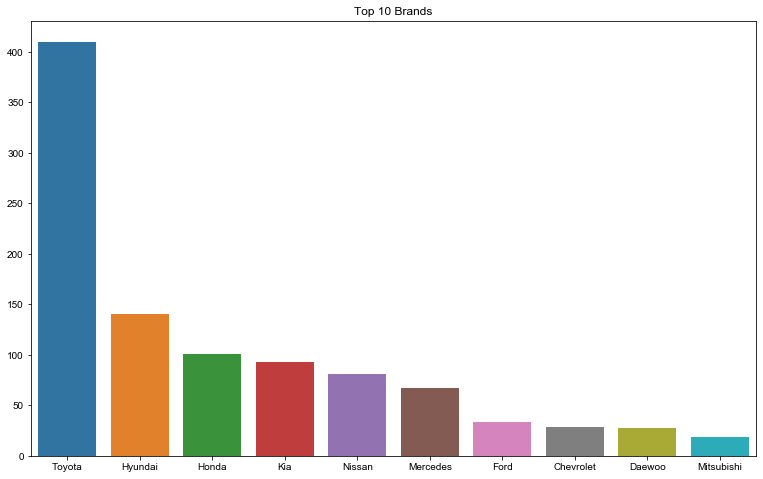

In [27]:
fig, ax = plt.subplots(figsize=(13, 8))
top10_brands = data['Brand'].value_counts()[:10]

sns.barplot(top10_brands.index, top10_brands.values)
sns.set(style='darkgrid')
plt.title("Top 10 Brands")

Above is a bar chart of the top 10 brands listed

#### Model year

Text(0.5, 1.0, 'Count of cars per model year')

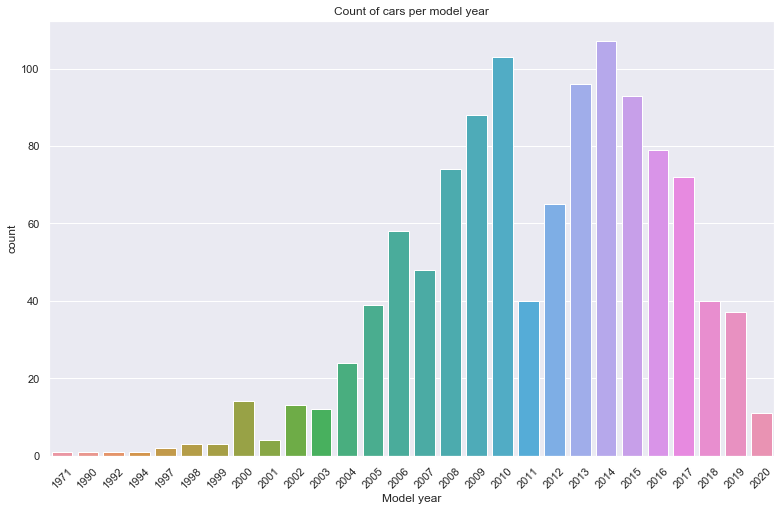

In [28]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.countplot(x='Model year', data=data)
plt.xticks(rotation=45)
plt.title("Count of cars per model year")

Above is a count of cars per model year
* Most cars listed were manufactured in 2010 and between 2013 and 2015
* There are some really old cars as well; from 1971

In [29]:
data['Model year'].value_counts()

2014    107
2010    103
2013     96
2015     93
2009     88
2016     79
2008     74
2017     72
2012     65
2006     58
2007     48
2018     40
2011     40
2005     39
2019     37
2004     24
2000     14
2002     13
2003     12
2020     11
2001      4
1999      3
1998      3
1997      2
1992      1
1971      1
1994      1
1990      1
Name: Model year, dtype: int64

#### Transmission

In [30]:
data['Transmission'].value_counts()

Automatic    1052
Manual         77
Name: Transmission, dtype: int64

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

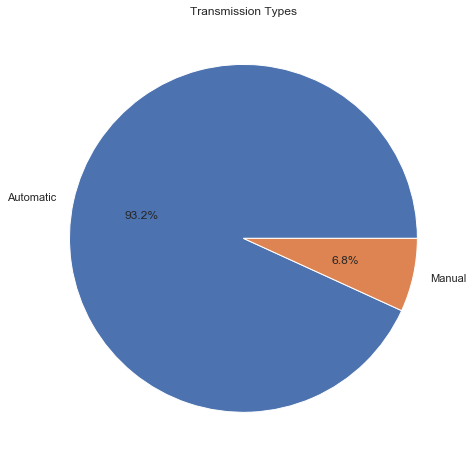

In [31]:
trans = data['Transmission'].value_counts()

fig, ax = plt.subplots(figsize=(13, 8))
plt.pie(trans.values, labels=trans.index, autopct='%1.1f%%')
plt.title("Transmission Types")

plt.xticks(rotation=45)

#### Body type

In [32]:
data['Body type'].value_counts()

Saloon          564
SUV / 4x4       343
Hatchback       163
Estate           10
MPV               4
Convertible       3
Coupé/Sports      3
Name: Body type, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

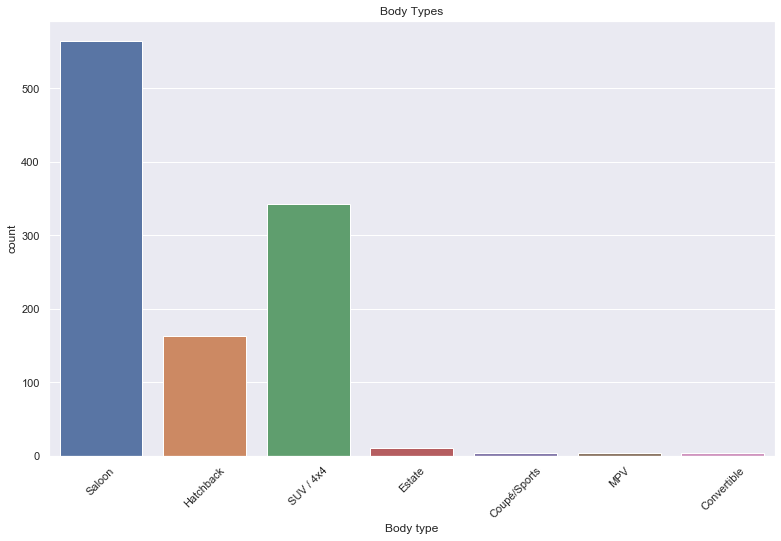

In [33]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.countplot(x='Body type', data=data)
plt.title("Body Types")

plt.xticks(rotation=45)

#### Fuel type

In [34]:
data['Fuel type'].describe()

count       1129
unique         8
top       Petrol
freq        1078
Name: Fuel type, dtype: object

In [35]:
data['Fuel type'].value_counts()

Petrol            1078
Diesel              44
Other                2
Petrol, Other        1
Hybrid               1
Petrol, Hybrid       1
Diesel, Petrol       1
CNG                  1
Name: Fuel type, dtype: int64

Since there are very small values of other fuel types, it will be grouped into a value "Other"

In [36]:
def combine(val):
    if val in ['Other', 'Hybrid', 'Petrol, Hybrid', 'CNG', 'Petrol, Other', 'Diesel, Petrol']:
        val = 'Other'
    else:
        pass
    return val

In [37]:
data['Fuel type'] = data['Fuel type'].apply(lambda x: combine(x))

In [38]:
data['Fuel type'].value_counts()

Petrol    1078
Diesel      44
Other        7
Name: Fuel type, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

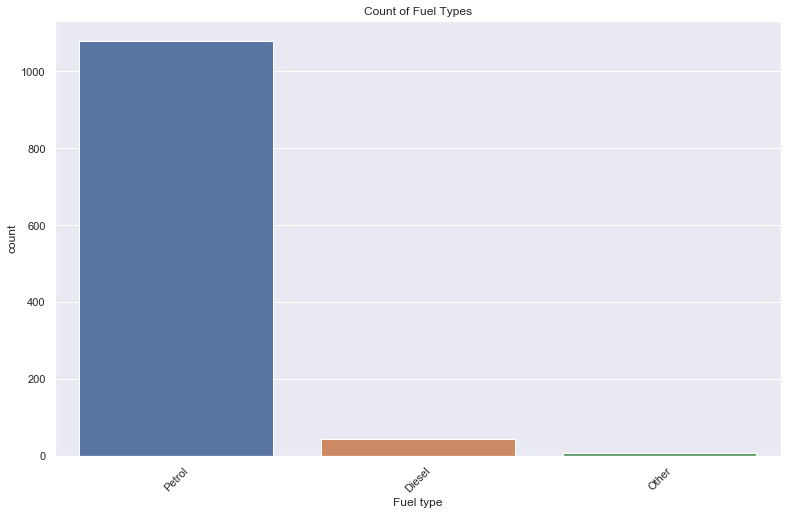

In [39]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.countplot(x='Fuel type', data=data)
plt.title("Count of Fuel Types")

plt.xticks(rotation=45)

In [40]:
data[(data['Fuel type'] == 'Other')]

,Listing,Price(GH¢),Condition,Brand,Model,Model year,Transmission,Body type,Fuel type,Mileage(km),Engine capacity(L),URL
73,Hyundai Sonata sport 2015,75000,Used,Hyundai,Sonata,2015,Automatic,Saloon,Other,20852,2.0,http://tonaton.com/en/ad/hyundai-sonata-sport-...
164,Honda Accord Touring 2017,110000,Used,Honda,Accord,2017,Automatic,Saloon,Other,20853,2.4,http://tonaton.com/en/ad/honda-accord-touring-...
625,Toyota Carina 2017,69000,New,Toyota,Carina,2017,Automatic,Saloon,Other,60002,2.4,http://tonaton.com/en/ad/toyota-carina-2017-fo...
642,Kia Sorento Limited edition 2011,48500,Used,Kia,Sorento,2011,Automatic,SUV / 4x4,Other,69855,2.4,http://tonaton.com/en/ad/kia-sorento-limited-e...
709,Toyota Carina 2007,14000,Used,Toyota,Carina,2007,Manual,Saloon,Other,278152,4.0,http://tonaton.com/en/ad/toyota-carina-2007-fo...
719,Hyundai Sonata 2001,8500,Used,Hyundai,Sonata,2001,Automatic,Saloon,Other,254477,2.0,http://tonaton.com/en/ad/hyundai-sonata-2001-f...
1083,Kia Sorento Ex 2013,55000,Used,Kia,Sorento,2013,Automatic,SUV / 4x4,Other,67000,2.4,http://tonaton.com/en/ad/kia-sorento-ex-2013-f...


#### Mileage

In [41]:
data['Mileage(km)'].describe()

count      1129.000000
mean      69411.401240
std       81779.654647
min           0.000000
25%       30865.000000
50%       60000.000000
75%       87524.000000
max      954642.000000
Name: Mileage(km), dtype: float64

Text(0.5, 1.0, 'Distribution of mileage in kilometers')

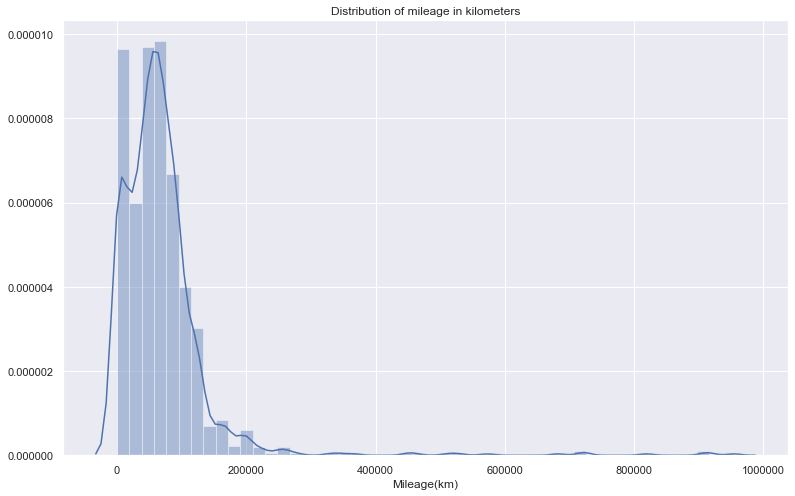

In [42]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.distplot(data['Mileage(km)'])
plt.title("Distribution of mileage in kilometers")

1.The average mileage is approximately 70,000km <br> 2. There are vehicles with mileage of 1,000,000km <br> 3. Mileage of 0km

Split the data into the two groups: cars with mileage below 300,000km and cars above 300,000km and investigate how it affacts price

#### Mileage above 300,000km

In [43]:
g_mile = data[data['Mileage(km)'] > 300000]

In [44]:
g_mile['Price(GH¢)'].mean()

54739.2

Average price for cars with mileage above 300,000km is GH¢ 54,739

#### Mileage below 300,000km

In [45]:
l_mile = data[~(data['Mileage(km)'] > 300000)]

In [46]:
l_mile['Price(GH¢)'].mean()

73171.43447037702

Average price for cars with mileage below 300,000km is GH¢ 73,171

##### Averagely, when the mileage is low, the price is high and vice versa

#### 0km mileage

In [47]:
data[data['Mileage(km)'] == 0]

,Listing,Price(GH¢),Condition,Brand,Model,Model year,Transmission,Body type,Fuel type,Mileage(km),Engine capacity(L),URL
40,Toyota RAV4 2015,87000,Used,Toyota,RAV4,2015,Automatic,SUV / 4x4,Petrol,0,2.5,http://tonaton.com/en/ad/toyota-rav4-2015-for-...
41,Toyota RAV4 2014,85000,Used,Toyota,RAV4,2014,Automatic,SUV / 4x4,Petrol,0,2.4,http://tonaton.com/en/ad/toyota-rav4-2014-for-...
44,Toyota Corolla 2015,70000,Used,Toyota,Corolla,2015,Automatic,Saloon,Petrol,0,1.8,http://tonaton.com/en/ad/toyota-corolla-2015-f...
46,Toyota Matrix 2010,44000,Used,Toyota,Matrix,2010,Automatic,Saloon,Petrol,0,1.8,http://tonaton.com/en/ad/toyota-matrix-2010-fo...
112,Toyota Camry XLE ✅ 2005,22500,Used,Toyota,Camry,2005,Automatic,Saloon,Petrol,0,2.0,http://tonaton.com/en/ad/toyota-camry-xle-2005...
119,Hyundai Elantra LE ✅ 2013,35500,Used,Hyundai,Elantra,2013,Automatic,Hatchback,Petrol,0,1.6,http://tonaton.com/en/ad/hyundai-elantra-le-20...
150,Toyota Yaris Sports 2017,45000,Used,Toyota,Yaris,2017,Automatic,Saloon,Petrol,0,1.4,http://tonaton.com/en/ad/toyota-yaris-sports-2...
174,Audi A4 2000,17000,Used,Audi,A4,2000,Manual,Saloon,Petrol,0,1.8,http://tonaton.com/en/ad/audi-a4-2000-for-sale...
192,Toyota Corolla SE ✅ 2010,31000,Used,Toyota,Corolla,2010,Manual,Saloon,Petrol,0,1.8,http://tonaton.com/en/ad/toyota-corolla-se-201...
242,Toyota iA/limited Edition ✅ 2016,46000,Used,Toyota,Other Model,2016,Automatic,Saloon,Petrol,0,1.5,http://tonaton.com/en/ad/toyota-ia-limited-edi...


In [48]:
data[data['Mileage(km)'] == 0]['Condition'].value_counts()

Used    29
New     24
Name: Condition, dtype: int64

It is almost impossible to have a mileage of 0km because even for a new car, it must have been at least driven to the garage <br> Furthermore, more than half of these vehicles are used ones so I believe that the mileage information for these vehicles are false

#### Engine Capacity

In [49]:
data['Engine capacity(L)'].describe()

count     1129
unique      37
top        1.8
freq       307
Name: Engine capacity(L), dtype: object

In [50]:
data['Engine capacity(L)'].value_counts()

1.8    307
2.4    172
2.0    128
1.6     87
2.5     69
3.0     55
1.5     55
3.5     42
2.7     38
1.0     37
1.2     27
1.4     22
1.3     15
4.0     11
3.7      7
0.8      7
4.2      6
3.3      6
4.5      5
1.1      5
5.7      4
2.8      4
6.0      2
3.4      2
4.6      2
3.6      2
1.7      2
5.6      1
5.3      1
3.2      1
1.9      1
5.0      1
0.5      1
0.7      1
2.2      1
4.7      1
2.3      1
Name: Engine capacity(L), dtype: int64

Text(0.5, 1.0, 'Distribution of Engine Capacity in litres')

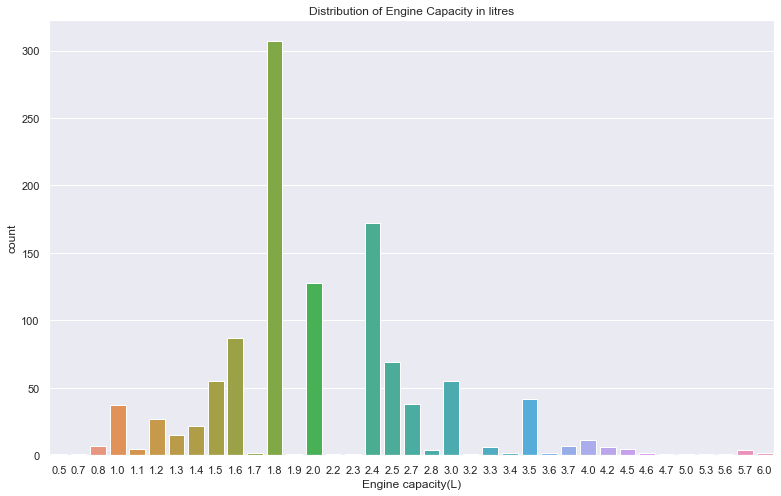

In [51]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.countplot(x = 'Engine capacity(L)', data=data)
plt.title("Distribution of Engine Capacity in litres")

1. Most cars have have an engine capacity of 1.8 litres
2. some cars have capacities above 4 litres

### Since this analysis focuses on the regular Ghanaian, futher analysis will be conducted on which features affect cars that cost between GH¢40,000 and GH¢80,000

In [52]:
filtered = data[(data['Price(GH¢)'] > 40000) & (data['Price(GH¢)'] < 80000)]

In [53]:
filtered.head()

,Listing,Price(GH¢),Condition,Brand,Model,Model year,Transmission,Body type,Fuel type,Mileage(km),Engine capacity(L),URL
2,Toyota Corolla 2015,42500,Used,Toyota,Corolla,2015,Automatic,NaN,Petrol,51410,1.8,http://tonaton.com/en/ad/toyota-corolla-2015-f...
10,Hyundai Accent 2015,42000,Used,Hyundai,Accent,2015,Automatic,Saloon,Petrol,231,1.6,http://tonaton.com/en/ad/hyundai-accent-2015-f...
14,SEAT Exeo 2011,48000,New,SEAT,Exeo,2011,Automatic,NaN,Diesel,170,2.0,http://tonaton.com/en/ad/seat-exeo-2011-for-sa...
19,Toyota Land Cruiser 2006,60000,Used,Toyota,Land Cruiser,2006,Manual,SUV / 4x4,Diesel,194860,4.2,http://tonaton.com/en/ad/toyota-land-cruiser-2...
24,Kia Rio GDI 2014,44000,Used,Kia,Rio,2014,Automatic,Hatchback,Petrol,39542,1.6,http://tonaton.com/en/ad/kia-rio-gdi-2014-for-...


In [54]:
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 2 to 1206
Data columns (total 12 columns):
Listing               333 non-null object
Price(GH¢)            333 non-null int64
Condition             333 non-null object
Brand                 333 non-null object
Model                 333 non-null object
Model year            333 non-null object
Transmission          333 non-null object
Body type             322 non-null object
Fuel type             333 non-null object
Mileage(km)           333 non-null int64
Engine capacity(L)    333 non-null object
URL                   333 non-null object
dtypes: int64(2), object(10)
memory usage: 33.8+ KB


In [55]:
filtered.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price(GH¢),333.0,56629.927928,11193.034162,40500.0,46500.0,55200.0,65000.0,79500.0
Mileage(km),333.0,65148.462462,61937.915038,0.0,41995.0,57990.0,75240.0,722241.0


In [56]:
filtered[['Listing', 'Brand', 'Model', 'Body type', 'Fuel type', 'Condition', 'Transmission']].describe()

,Listing,Brand,Model,Body type,Fuel type,Condition,Transmission
count,333,333,333,322,333,333,333
unique,287,22,64,6,3,2,2
top,Toyota Camry SE 2014,Toyota,Corolla,Saloon,Petrol,Used,Automatic
freq,6,140,69,220,322,289,324


### Price

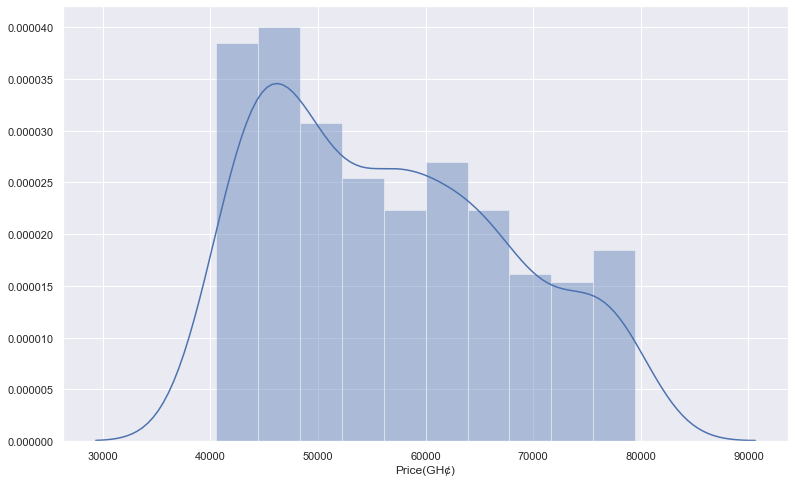

In [57]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.distplot(filtered['Price(GH¢)'], bins=10)

In [58]:
filtered['Price(GH¢)'].describe()

count      333.000000
mean     56629.927928
std      11193.034162
min      40500.000000
25%      46500.000000
50%      55200.000000
75%      65000.000000
max      79500.000000
Name: Price(GH¢), dtype: float64

### Brand vs Price

In [59]:
fig = px.box(filtered, x="Brand", y="Price(GH¢)", title='Relationship between each brand and price')
fig.show()

### Body type vs Price

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

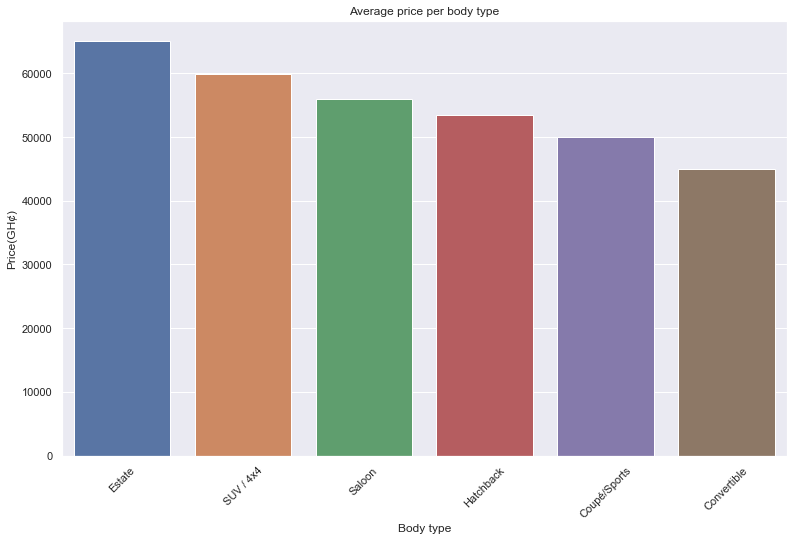

In [60]:
body_price = filtered.groupby('Body type').mean()['Price(GH¢)'].to_frame().reset_index().sort_values('Price(GH¢)', ascending=False)

fig, ax = plt.subplots(figsize=(13, 8))
sns.barplot(body_price['Body type'], body_price['Price(GH¢)'])
plt.title("Average price per body type")

plt.xticks(rotation=45)

In [61]:
fig = px.box(filtered, x="Body type", y="Price(GH¢)", title='Relationship between each brand and price')
fig.show()

### Fuel type vs Price

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

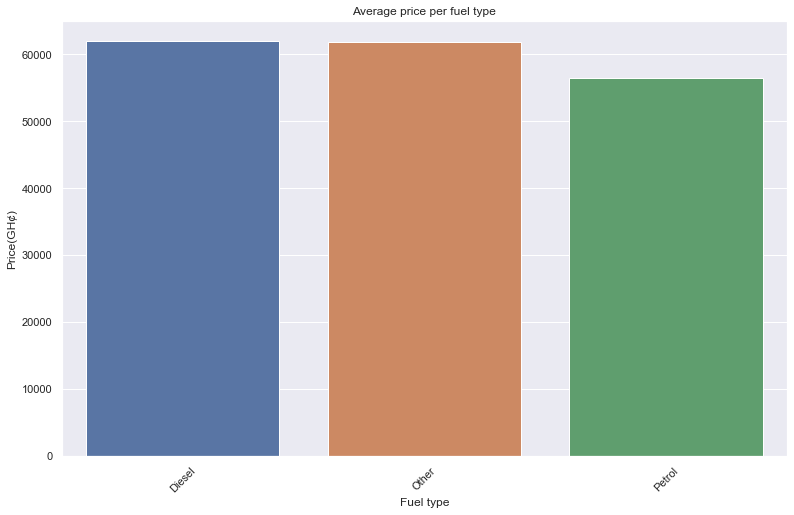

In [62]:
body_price = filtered.groupby('Fuel type').mean()['Price(GH¢)'].to_frame().reset_index().sort_values('Price(GH¢)', ascending=False)

fig, ax = plt.subplots(figsize=(13, 8))
sns.barplot(body_price['Fuel type'], body_price['Price(GH¢)'])
plt.title("Average price per fuel type")

plt.xticks(rotation=45)

In [63]:
fig = px.box(filtered, x="Fuel type", y="Price(GH¢)", title='Relationship between each fuel type and price')
fig.show()

### Condition vs Price

In [64]:
fig = px.box(filtered, x="Condition", y="Price(GH¢)", title='Relationship between each condition and price')
fig.show()

In [65]:
filtered.groupby('Condition').mean()['Price(GH¢)']

Condition
New     59062.068182
Used    56259.636678
Name: Price(GH¢), dtype: float64

### Transmission vs Price

In [66]:
fig = px.box(filtered, x="Transmission", y="Price(GH¢)", title='Relationship between each transmission and price')
fig.show()

In [67]:
filtered.groupby('Transmission').mean()['Price(GH¢)']

Transmission
Automatic    56638.783951
Manual       56311.111111
Name: Price(GH¢), dtype: float64

### Mileage vs Price

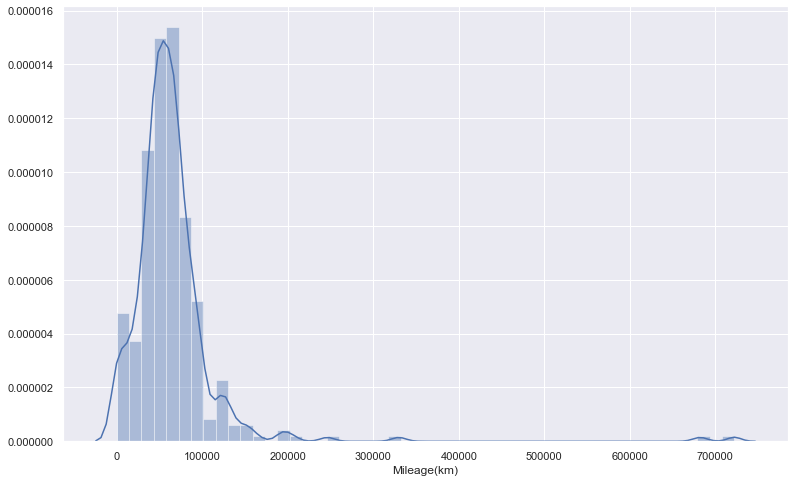

In [68]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.distplot(filtered['Mileage(km)'])

In [69]:
g_mile = filtered[filtered['Mileage(km)'] > 200000]

g_mile['Price(GH¢)'].median()

71588.0

Average price for cars with mileage above 200,000km is GH¢67,017

In [70]:
l_mile = filtered[filtered['Mileage(km)'] < 200000]

l_mile['Price(GH¢)'].median()

55000.0

Average price for cars with mileage below 200,000km is GH¢56,471

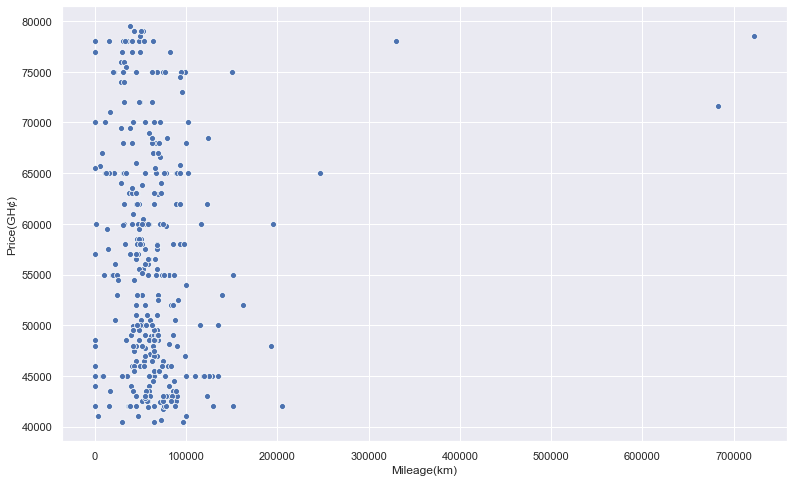

In [71]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.scatterplot(x=filtered['Mileage(km)'], y=filtered['Price(GH¢)'])

In [72]:
filtered[['Mileage(km)', 'Price(GH¢)']].corr()

,Mileage(km),Price(GH¢)
Mileage(km),1.000000,0.036053
Price(GH¢),0.036053,1.000000


### Model year vs Price

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

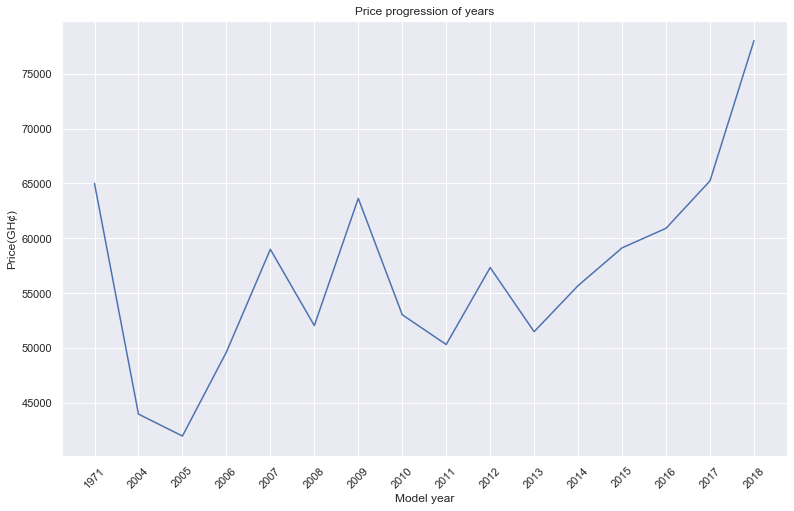

In [73]:
year_price = filtered.groupby('Model year').mean()['Price(GH¢)'].to_frame().reset_index().sort_values('Price(GH¢)', ascending=False)

fig, ax = plt.subplots(figsize=(13, 8))
sns.lineplot(x="Model year", y="Price(GH¢)", data=year_price)
plt.title("Price progression of years")
plt.xticks(rotation=45)

#### Derive an age column

In [74]:
filtered['Model year'] = pd.to_datetime(filtered['Model year'])

In [75]:
from datetime import datetime
from datetime import date

def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

filtered.loc[:, 'Age'] = filtered['Model year'].apply(calculate_age)

In [76]:
filtered[['Model year', 'Age']]

,Model year,Age
2,2015-01-01,5
10,2015-01-01,5
14,2011-01-01,9
19,2006-01-01,14
24,2014-01-01,6
...,...,...
1187,2015-01-01,5
1194,2010-01-01,10
1199,2017-01-01,3
1203,2008-01-01,12


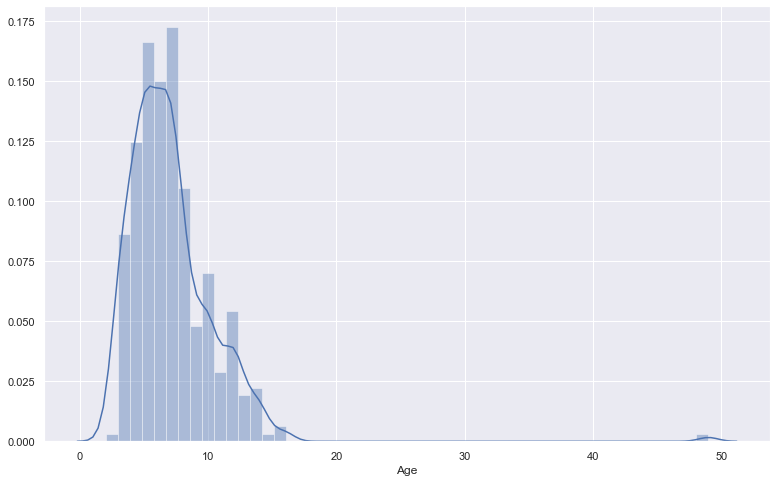

In [77]:
fig, ax = plt.subplots(figsize=(13,8))
sns.distplot(filtered['Age'])

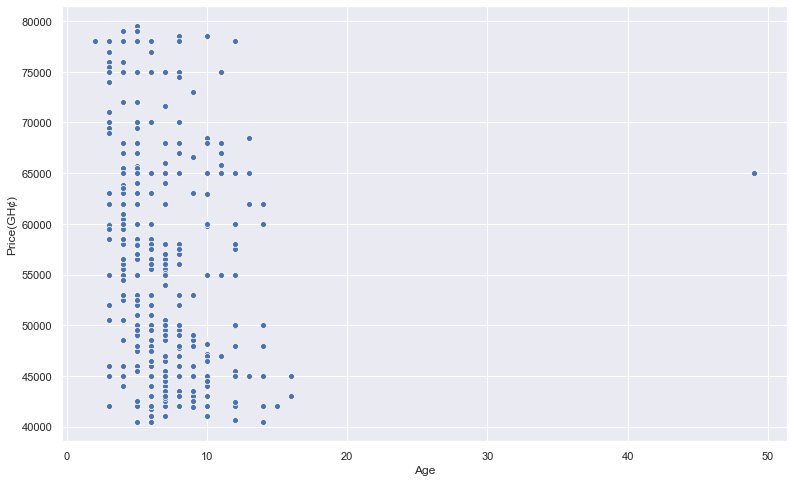

In [78]:
fig, ax=plt.subplots(figsize=(13, 8))
sns.scatterplot(x=filtered['Age'], y=filtered['Price(GH¢)'])

In [79]:
filtered[['Age', 'Price(GH¢)']].corr()

,Age,Price(GH¢)
Age,1.000000,-0.186474
Price(GH¢),-0.186474,1.000000


### Engine capacity vs Price

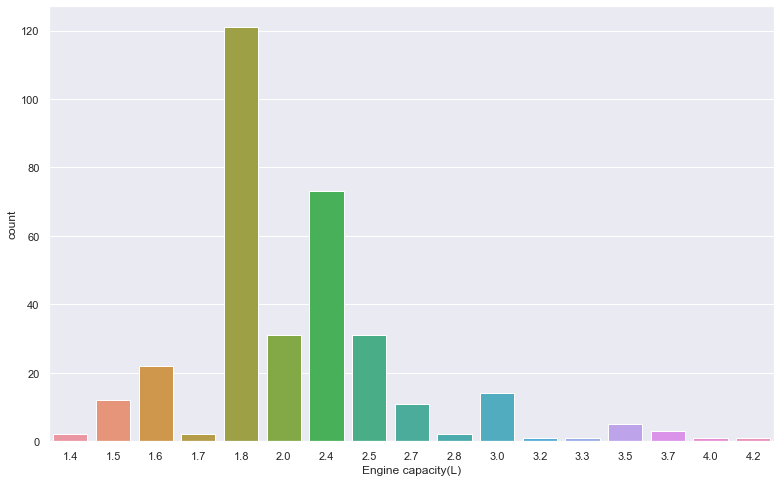

In [80]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.countplot(filtered['Engine capacity(L)'])

In [81]:
fig = px.box(filtered, x="Engine capacity(L)", y="Price(GH¢)", title='Relationship between each engine capacity and price')
fig.show()